In [20]:
from keras import models
from keras import layers
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np 
from keras import optimizers


In [21]:
#Eğitim için gerekli değerleri belirtiyoruz. Burada XOR işleminde X içerisinde girişleri Y içerisinde çıktılarını belirliyoruz
data_in = np.array([[0,0],[0,1],[1,0],[1,1]])
data_out = np.array([[0],[1],[1],[0]])

In [23]:
#Sequential bir model kullanacağımızı belirtiyoruz
model=models.Sequential()


In [24]:
#Burada yapay sinir ağımızı örmeye başlıyoruz.
#Burası ilk gizli katmanımız olacaktır.
#Sequential modelden oluşturulmuş nesyene ilk katmanda 8 adet nöron oluşturuyoruz. 
#Activation modeli olarak Sequential model kullandığımızda linear bir activation modeli şeçiyoruz. Rectified Linear Unit (relu) seçiyoruz
#Girdi olarak ise 0 - 1'lerden oluşan 2 adet giriş olduğunu belirtiyoruz.
model.add(layers.Dense(8,activation='relu',input_shape=(2,)))

In [25]:
#Ve burada br adet çıktı oluşturuyoruz. Çıktımız ya 0 ya 1 bşka ihtimal yok. Burada da activation modeli olarak sigmoid kullanıyoruz.
model.add(layers.Dense(1,activation='sigmoid'))

In [29]:
#Burada ise optimizer değerimizi ayarlarıyoruz. Optimizer değeri bize doğrusal olmayan problemin optimum değerini bulmada yardımcı olmaktadır. 
# rmssprop,adam,sgd gibi bir çok optimezer değerleri vardır 
#SGD seçiyoruz ve lr ile learning rate yani öğrenme hızını ayarlıyoruz
#Tek bir çıkış olduğu için binart_crossentropy kullanıyoruz
#metrics ile de acc değerinin yazması için giriyoruz
model.compile(optimizer=optimizers.SGD(lr=0.1),loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
#2 girişli ilk ara katmanda 8 nöron ve sonra çıkış katmanında 1 nöron oluşturmuştuk
#Burada epoch 1000 yaparak tüm veri setini 1000 sefer yeniliyoruz
#Batch size ile ise oluşturduğumuz optimizer parametreyi 512 adımda bir çalıştırdığımızı belirtiyoruz
history=model.fit(data_in,data_out,epochs=1000,batch_size=512)

Epoch 1/1000
4/4 [==============================] - 0s - loss: 0.0122 - acc: 1.0000
Epoch 2/1000
4/4 [==============================] - 0s - loss: 0.0122 - acc: 1.0000
Epoch 3/1000
4/4 [==============================] - 0s - loss: 0.0122 - acc: 1.0000
Epoch 4/1000
4/4 [==============================] - 0s - loss: 0.0122 - acc: 1.0000
Epoch 5/1000
4/4 [==============================] - 0s - loss: 0.0122 - acc: 1.0000
Epoch 6/1000
4/4 [==============================] - 0s - loss: 0.0122 - acc: 1.0000
Epoch 7/1000
4/4 [==============================] - 0s - loss: 0.0122 - acc: 1.0000
Epoch 8/1000
4/4 [==============================] - 0s - loss: 0.0122 - acc: 1.0000
Epoch 9/1000
4/4 [==============================] - 0s - loss: 0.0122 - acc: 1.0000
Epoch 10/1000
4/4 [==============================] - 0s - loss: 0.0122 - acc: 1.0000
Epoch 11/1000
4/4 [==============================] - 0s - loss: 0.0121 - acc: 1.0000
Epoch 12/1000
4/4 [==============================] - 0s - loss: 0.0121 - a

In [41]:
#Ve son olarak eğitimimizin ne kadar sağlıklı sonuçlar verdiğini ekrana basıyoruz
print(model.predict_proba(X))

4/4 [==============================] - 0s
[[ 0.020926  ]
 [ 0.9970451 ]
 [ 0.99738044]
 [ 0.00146304]]


In [42]:
#Ve en sonda ise eğitilmiş modeli ve ağırlıklarını kaydediyoruz.
model.save('XOR')
model.save_weights('XOR_w')

In [43]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


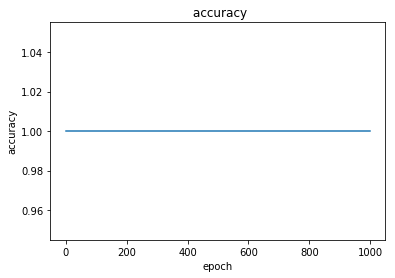

In [45]:
plt.figure(1)
plt.plot(history.history['acc'])
plt.title(' accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

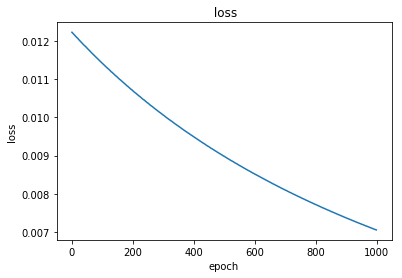

In [46]:
plt.figure(2)
plt.plot(history.history['loss'])
plt.title(' loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()